<a href="https://colab.research.google.com/github/akhiladdepalli/heart-stroke-prediction/blob/main/titanicproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
titanic = pd.read_csv('train_dataset.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
print('Survived : ', titanic.Survived.unique())
print('Pclasses : ', titanic.Pclass.unique())
print('Gender   : ', titanic.Sex.unique())
print('Embarked : ', titanic.Embarked.dropna().unique())

Survived :  [0 1]
Pclasses :  [3 1 2]
Gender   :  ['male' 'female']
Embarked :  ['S' 'C' 'Q']




---



---

## Check for duplicates

In [ ]:
titanic.duplicated().sum()

np.int64(0)

In [ ]:
titanic.drop_duplicates(inplace=True)

## Dealing with missing values

In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- **If number of missing values in a column is very large wrt total values then dropping that column is a suitable strategy**

In [ ]:
687/891

0.7710437710437711

In [ ]:
titanic.drop('Cabin', axis = 1, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- **In numerical columns missing values can be replaced by the mean or median of that column**

<Axes: xlabel='Age', ylabel='Density'>

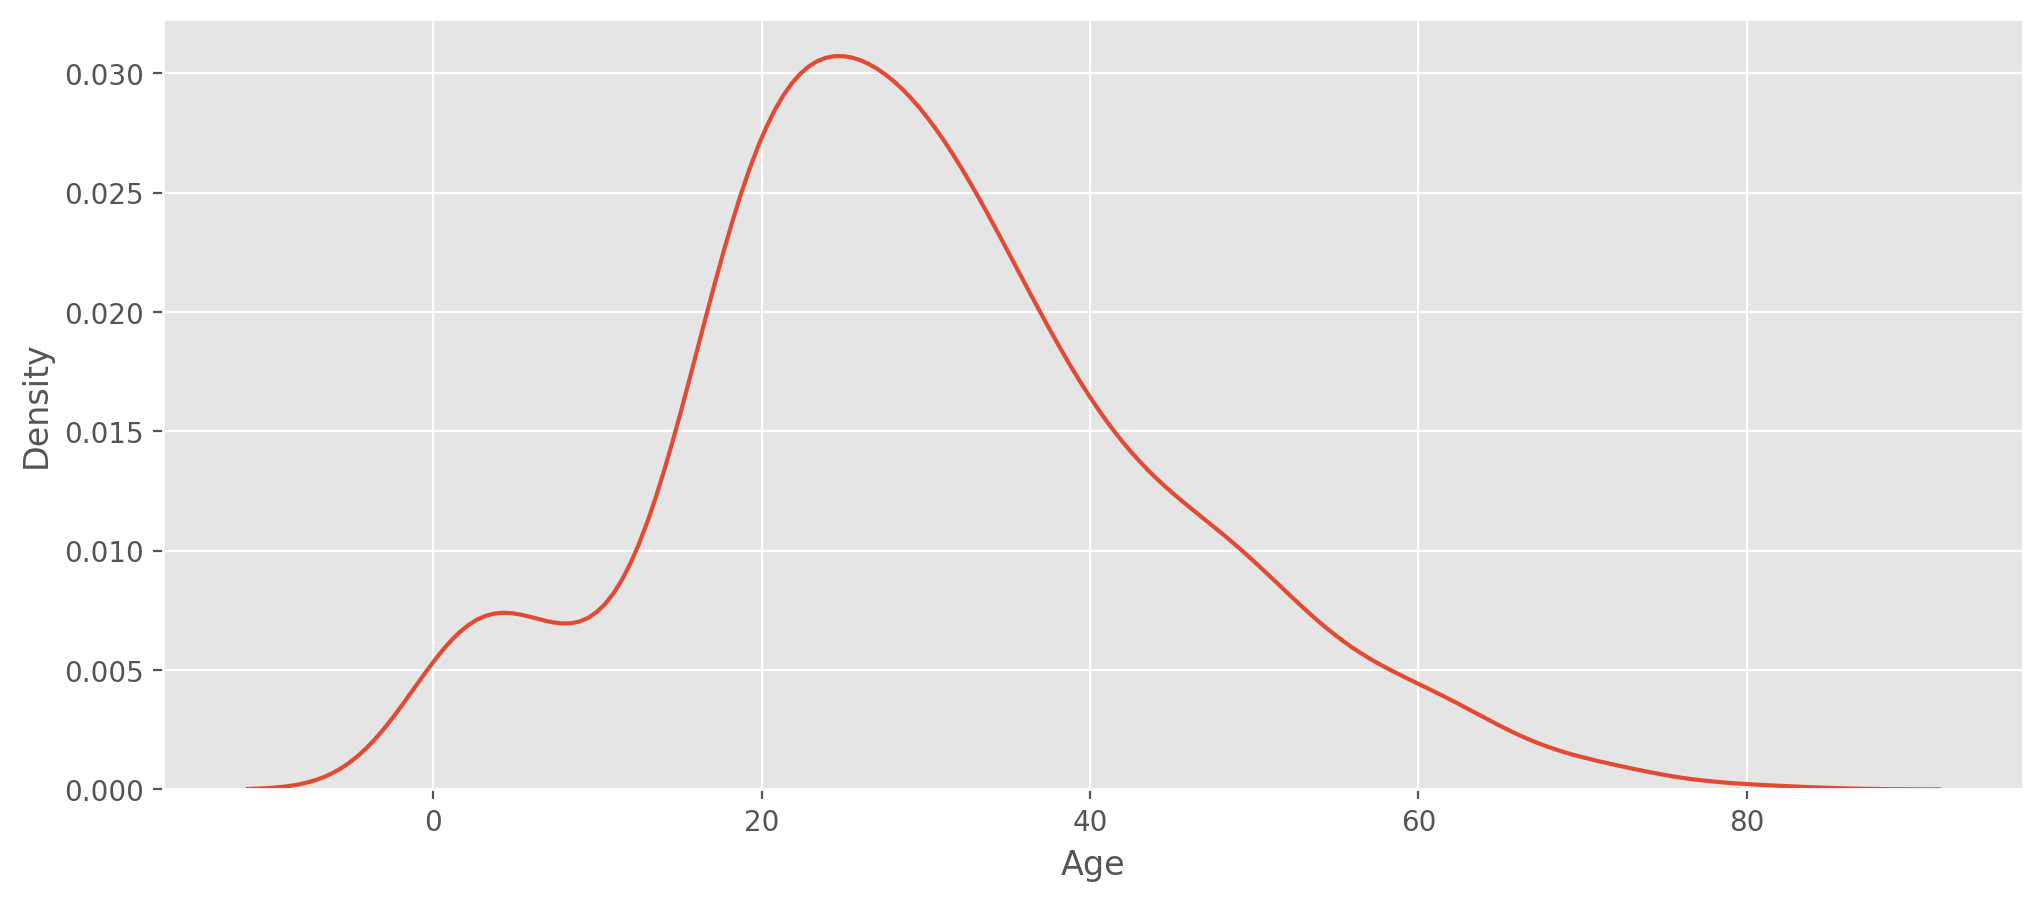

In [ ]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(titanic.Age, hist = False)

In [ ]:
mean_age = titanic.Age.mean()
titanic.Age.replace(np.nan, mean_age, inplace = True)

In [ ]:
titanic.Age.isnull().sum()

np.int64(0)

- **In categorical columns missing values can be replaced with mode**

In [ ]:
mode_emb = titanic.Embarked.dropna().mode()[0]
mode_emb

'S'

In [ ]:
mode_emb = titanic.Embarked.dropna().mode()[0]
titanic.Embarked.replace(np.nan, mode_emb, inplace = True)

In [ ]:
titanic.Embarked.isnull().sum()

np.int64(0)

In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Strategies to deal with missing values
- If number of missing values in a column is very large wrt total values then dropping that column is a suitable strategy
- In numerical columns missing values can be replaced by the mean or median of that column
- In categorical columns missing values cam be replaced with mode
- If number of rows having missing values is very small wrt total rows then these rows can be dropped - titanic.dropna(inplace = True)

In [ ]:
titanic['family_members'] = titanic.SibSp + titanic.Parch
titanic.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0




---



---


## Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

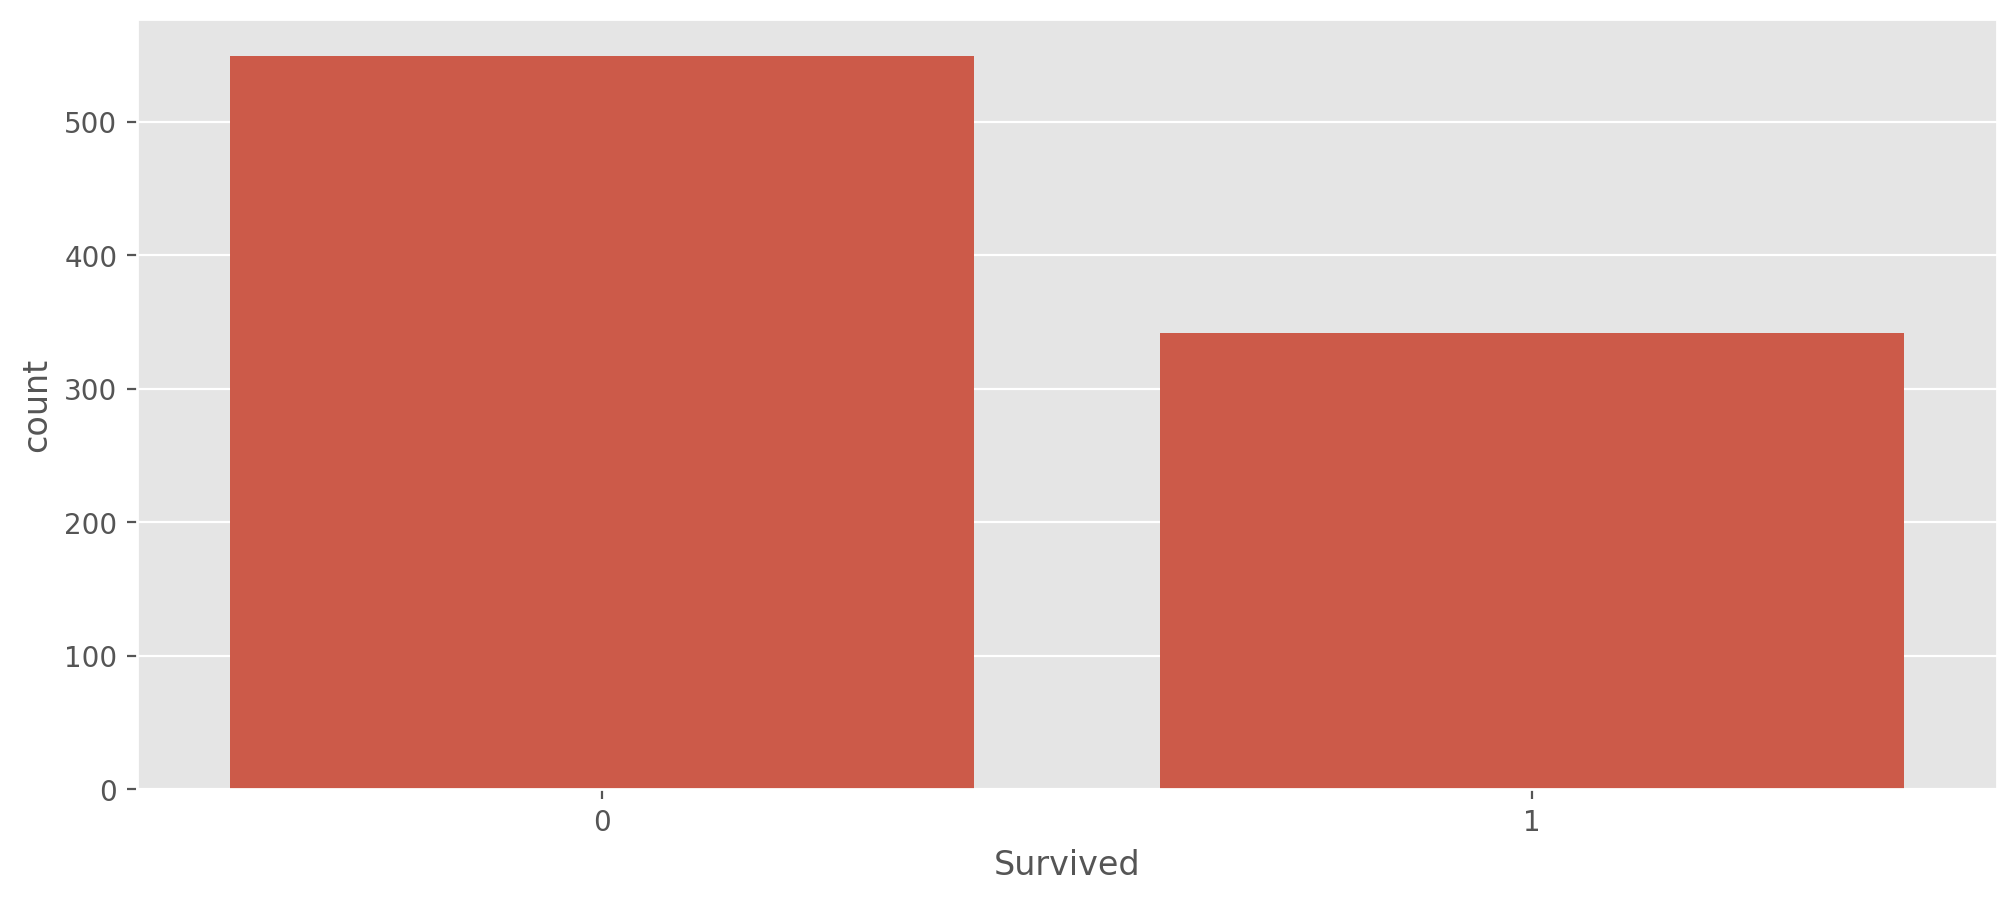

In [ ]:
# How many passengers survived and how many did not survive
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Survived', data = titanic)

In [ ]:
titanic.Survived.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
survival_ratio = titanic.Survived.value_counts(normalize = True)
print('Percentage of survivors : ', round(survival_ratio[1]*100,2))
print('Percentage of dead      : ', round(survival_ratio[0]*100,2))

Percentage of survivors :  38.38
Percentage of dead      :  61.62


<Axes: xlabel='Sex', ylabel='count'>

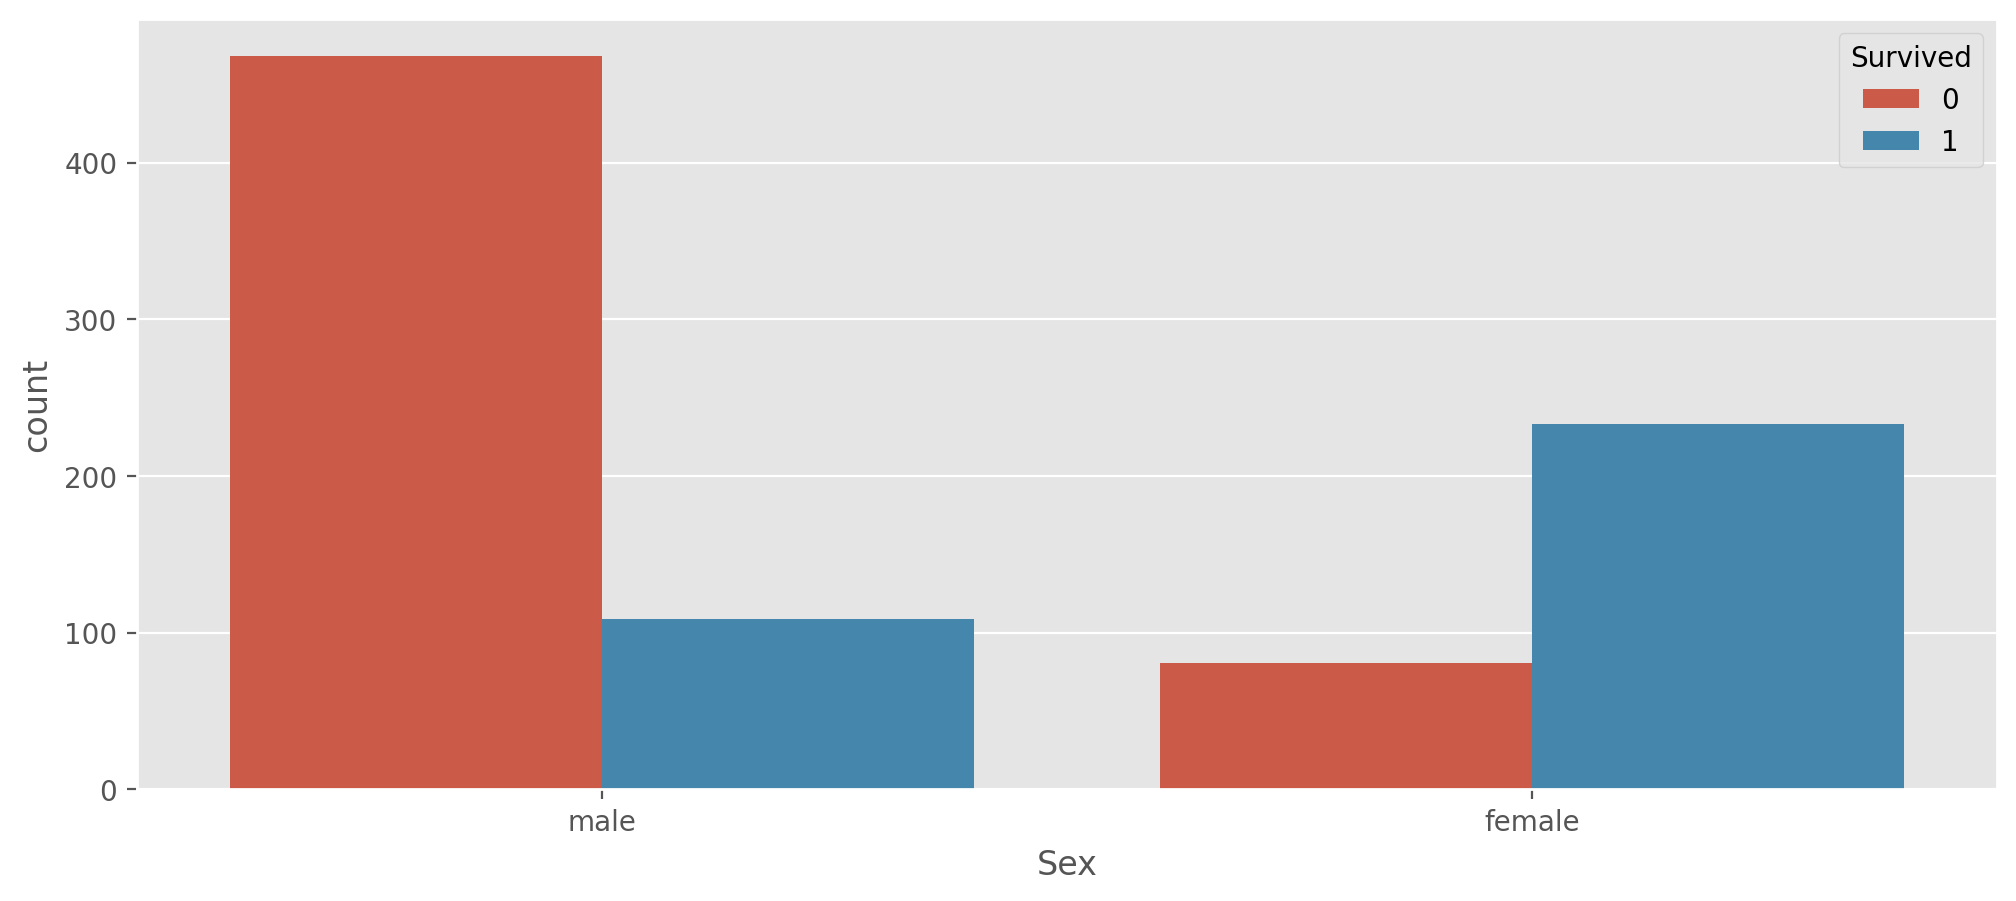

In [ ]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic)

In [ ]:
svl_rate = titanic.groupby('Sex').Survived.value_counts(normalize = True)
svl_rate

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [ ]:
print('Percentage of female survivors : ', round(svl_rate['female'][1]*100,2))
print('Percentage of dead females     : ', round(svl_rate['female'][0]*100,2))
print('Percentage of male survivors   : ', round(svl_rate['male'][1]*100,2))
print('Percentage of dead males       : ', round(svl_rate['male'][0]*100,2))

Percentage of female survivors :  74.2
Percentage of dead females     :  25.8
Percentage of male survivors   :  18.89
Percentage of dead males       :  81.11


In [ ]:
 svl_rate['male']

,proportion
Survived,
0,0.811092
1,0.188908


Text(0.5, 1.0, 'Female Survival')

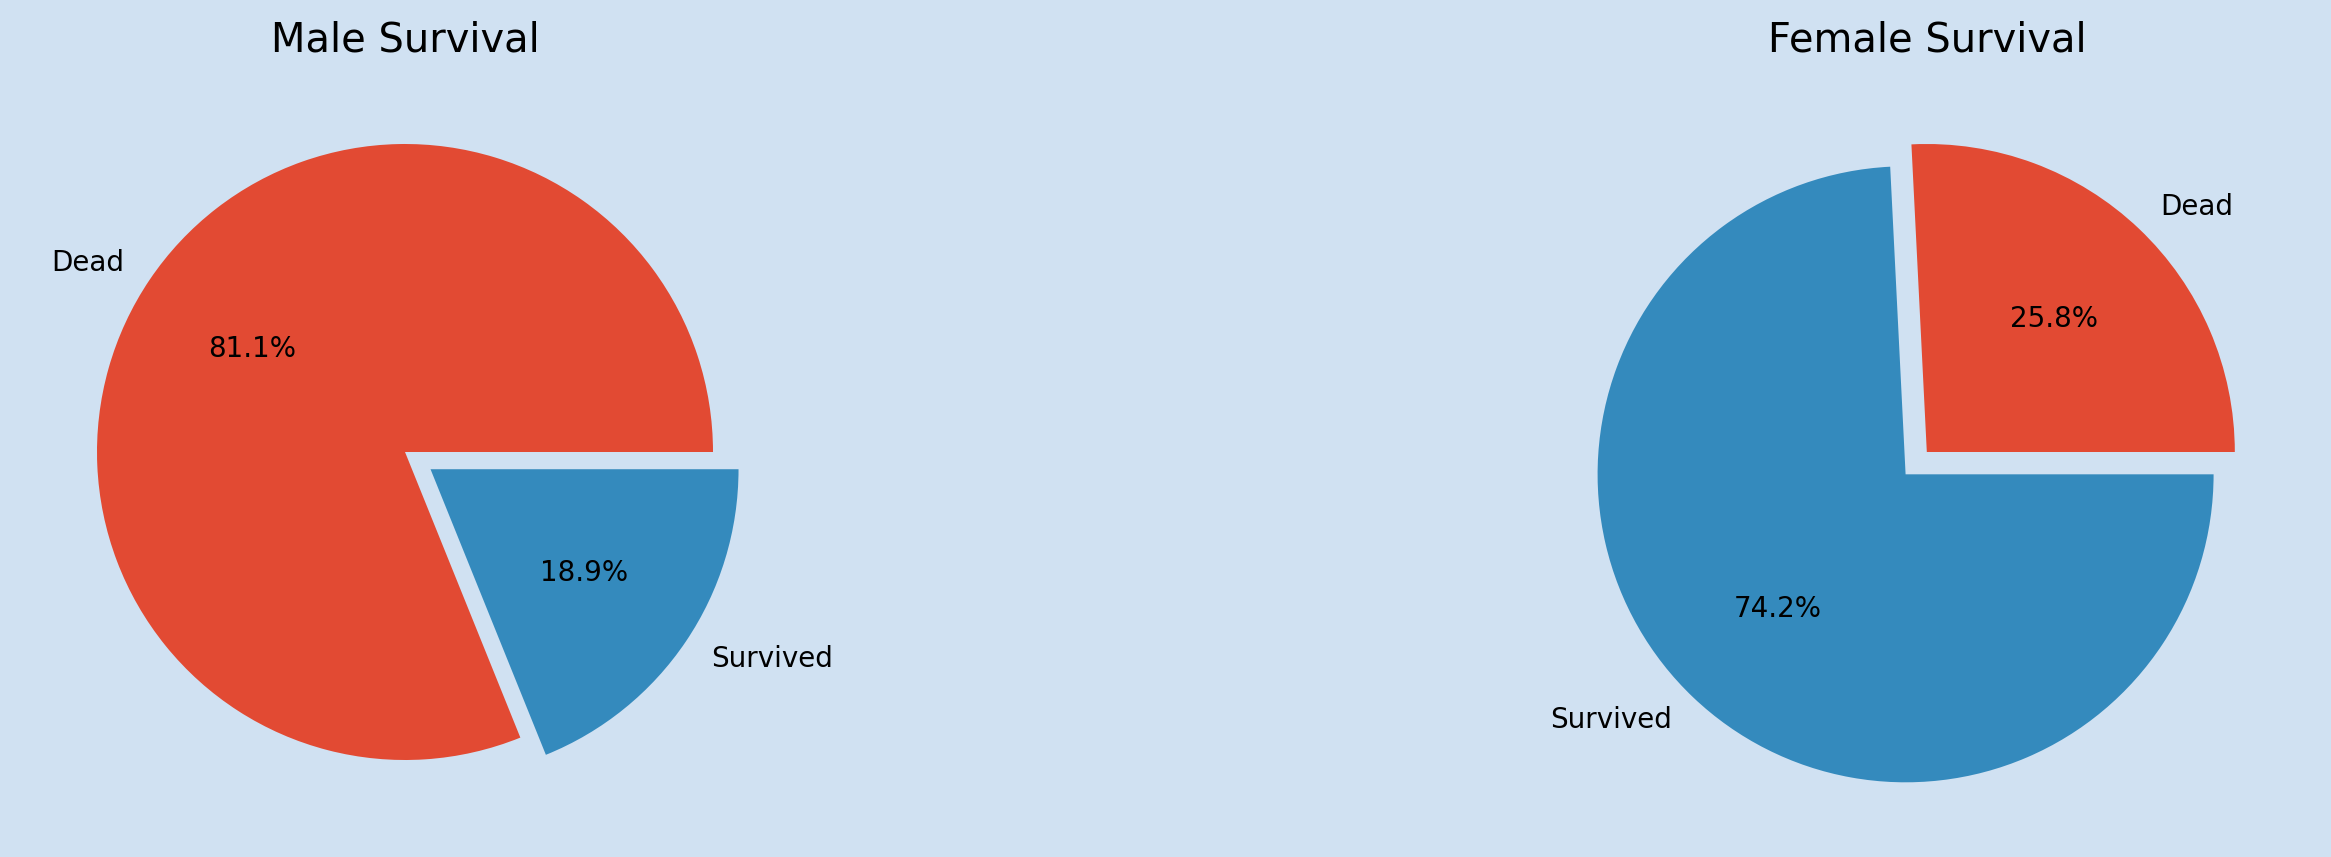

In [ ]:
svl_rate = svl_rate.sort_index()
males = svl_rate['male']
females = svl_rate['female']
labels = ['Dead', 'Survived']

plt.figure(figsize = (18,5), dpi = 200, facecolor = '#d0e1f2')
plt.subplot(1,2,1)
plt.pie(males, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Male Survival')
plt.subplot(1,2,2)
plt.pie(females, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Female Survival')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


<Axes: xlabel='Pclass', ylabel='count'>

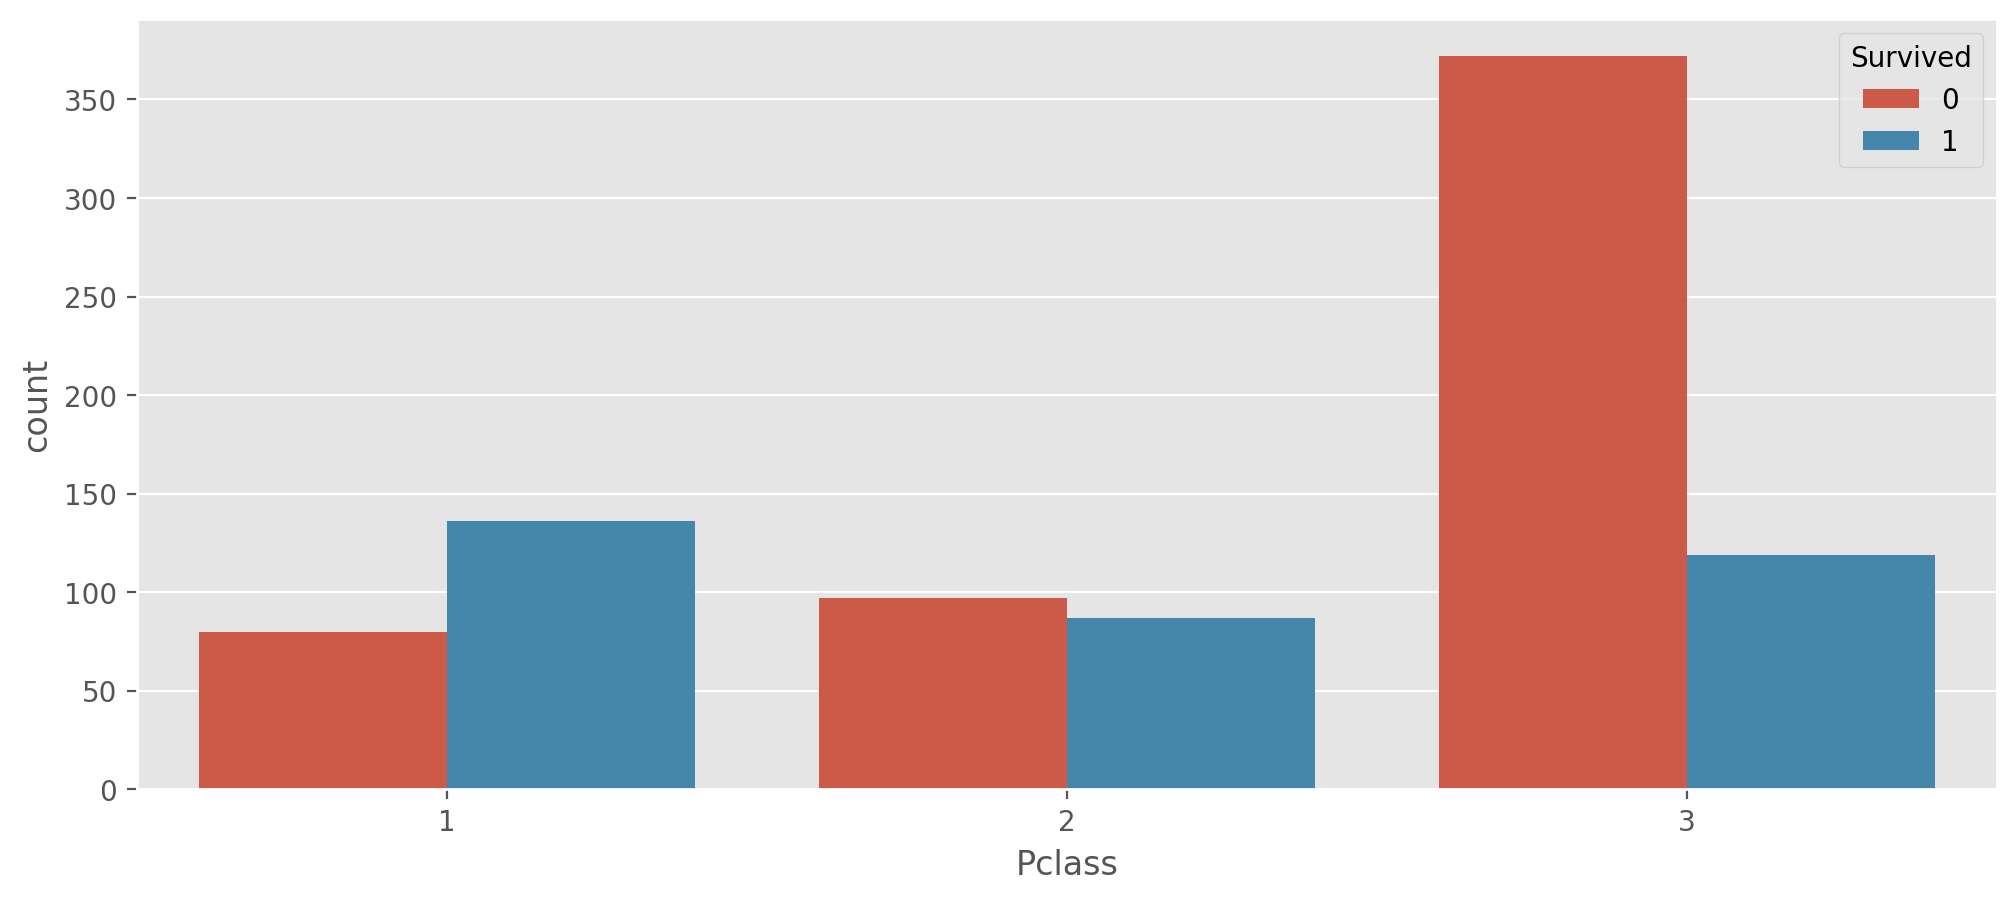

In [ ]:
# Analysing passenger class and survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)

In [ ]:
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [ ]:
titanic.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [ ]:
svl_rate = titanic.groupby('Pclass')['Survived'].value_counts(normalize  = True)
svl_rate

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

In [ ]:
print('Percentage of 1st Passenger class Survivors : ', round(svl_rate[1][1]*100,2), '%')
print('Percentage of 1st Passenger class Dead      : ', round(svl_rate[1][0]*100,2), '%')
print('Percentage of 2nd Passenger class Survivors : ', round(svl_rate[2][1]*100,2), '%')
print('Percentage of 2nd Passenger class Dead      : ', round(svl_rate[2][0]*100,2), '%')
print('Percentage of 3rd Passenger class Survivors : ', round(svl_rate[3][1]*100,2), '%')
print('Percentage of 3rd Passenger class Dead      : ', round(svl_rate[3][0]*100,2), '%')

Percentage of 1st Passenger class Survivors :  62.96 %
Percentage of 1st Passenger class Dead      :  37.04 %
Percentage of 2nd Passenger class Survivors :  47.28 %
Percentage of 2nd Passenger class Dead      :  52.72 %
Percentage of 3rd Passenger class Survivors :  24.24 %
Percentage of 3rd Passenger class Dead      :  75.76 %


Text(0.5, 1.0, 'Passenger Class3')

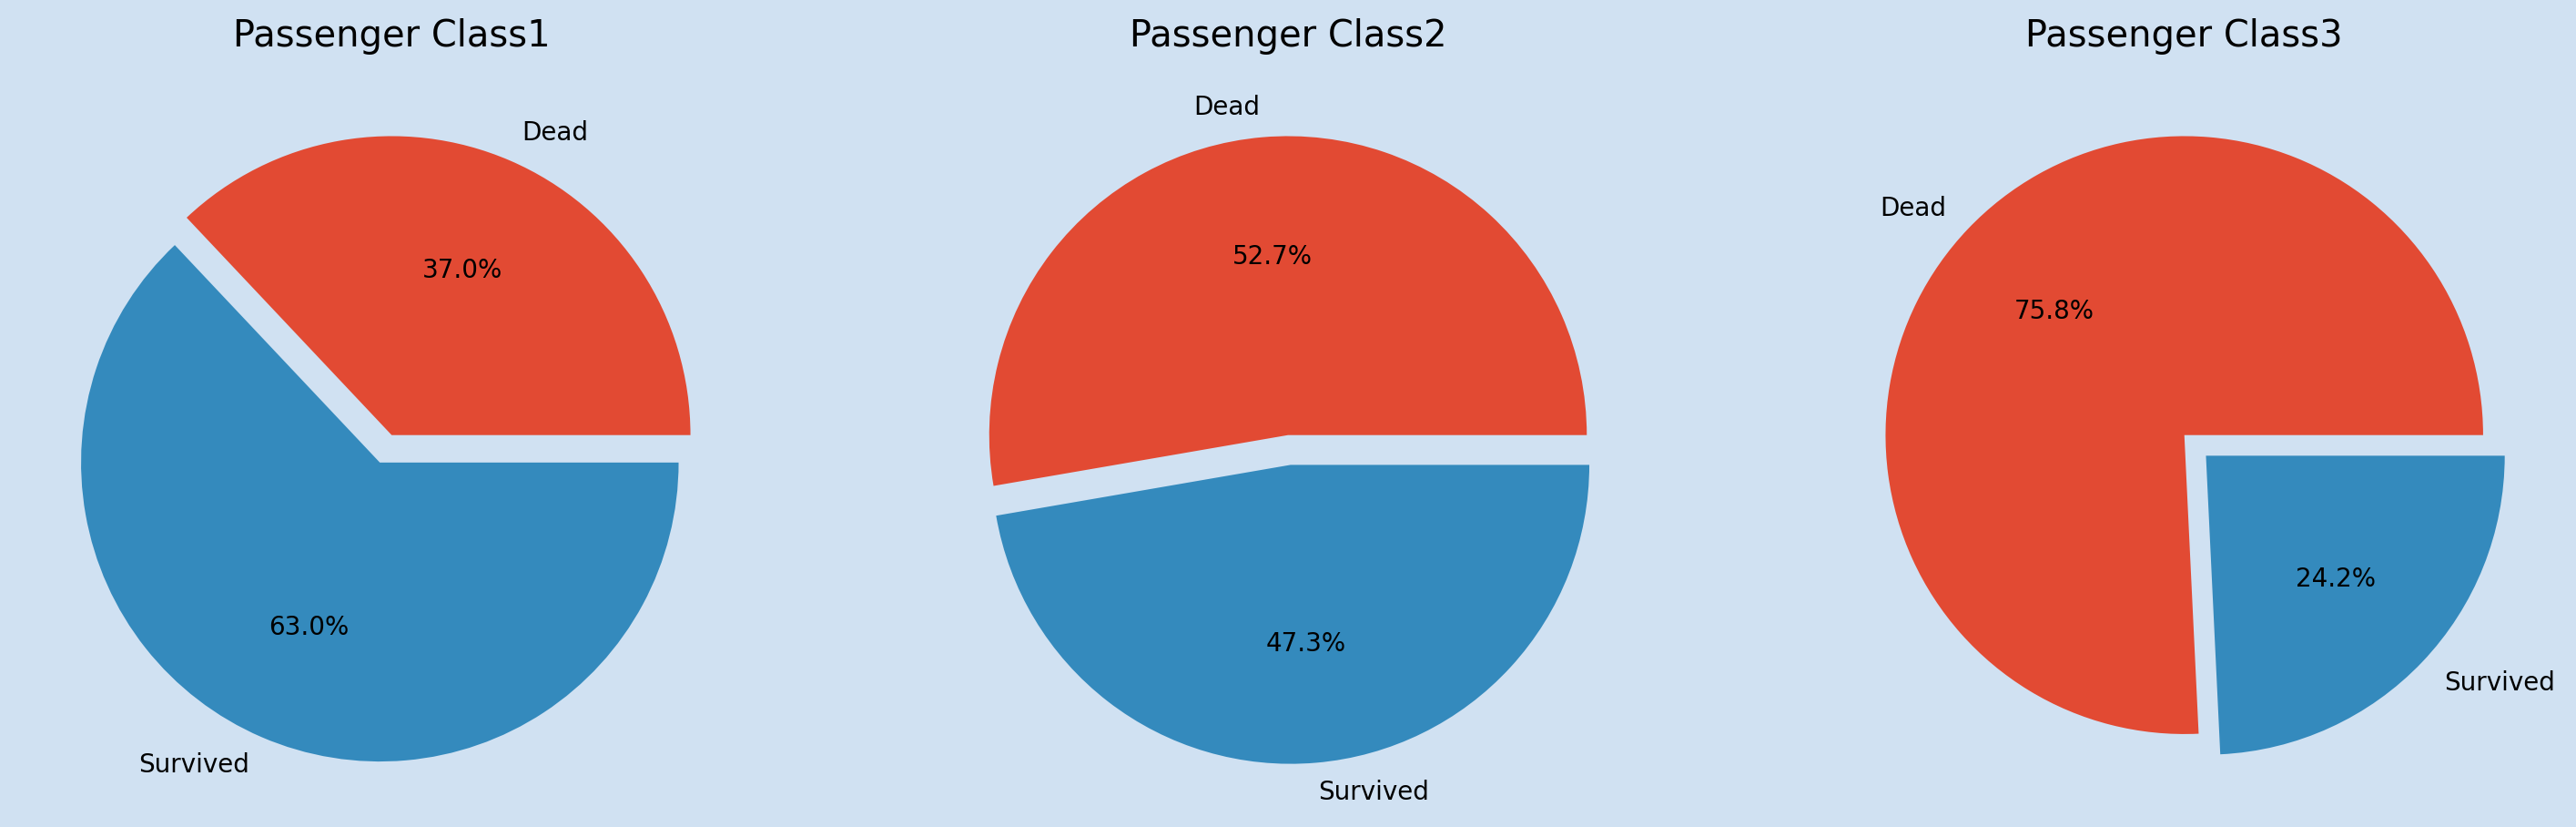

In [ ]:
svl_rate = svl_rate.sort_index()
pclass1, pclass2, pclass3 = svl_rate[1], svl_rate[2], svl_rate[3]
labels = ['Dead', 'Survived']

plt.figure(figsize = (18,6), dpi = 200, facecolor = '#d0e1f2')
plt.subplot(1,3,1)
plt.pie(pclass1, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Passenger Class1')
plt.subplot(1,3,2)
plt.pie(pclass2, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Passenger Class2')
plt.subplot(1,3,3)
plt.pie(pclass3, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Passenger Class3')

<Axes: xlabel='Embarked', ylabel='count'>

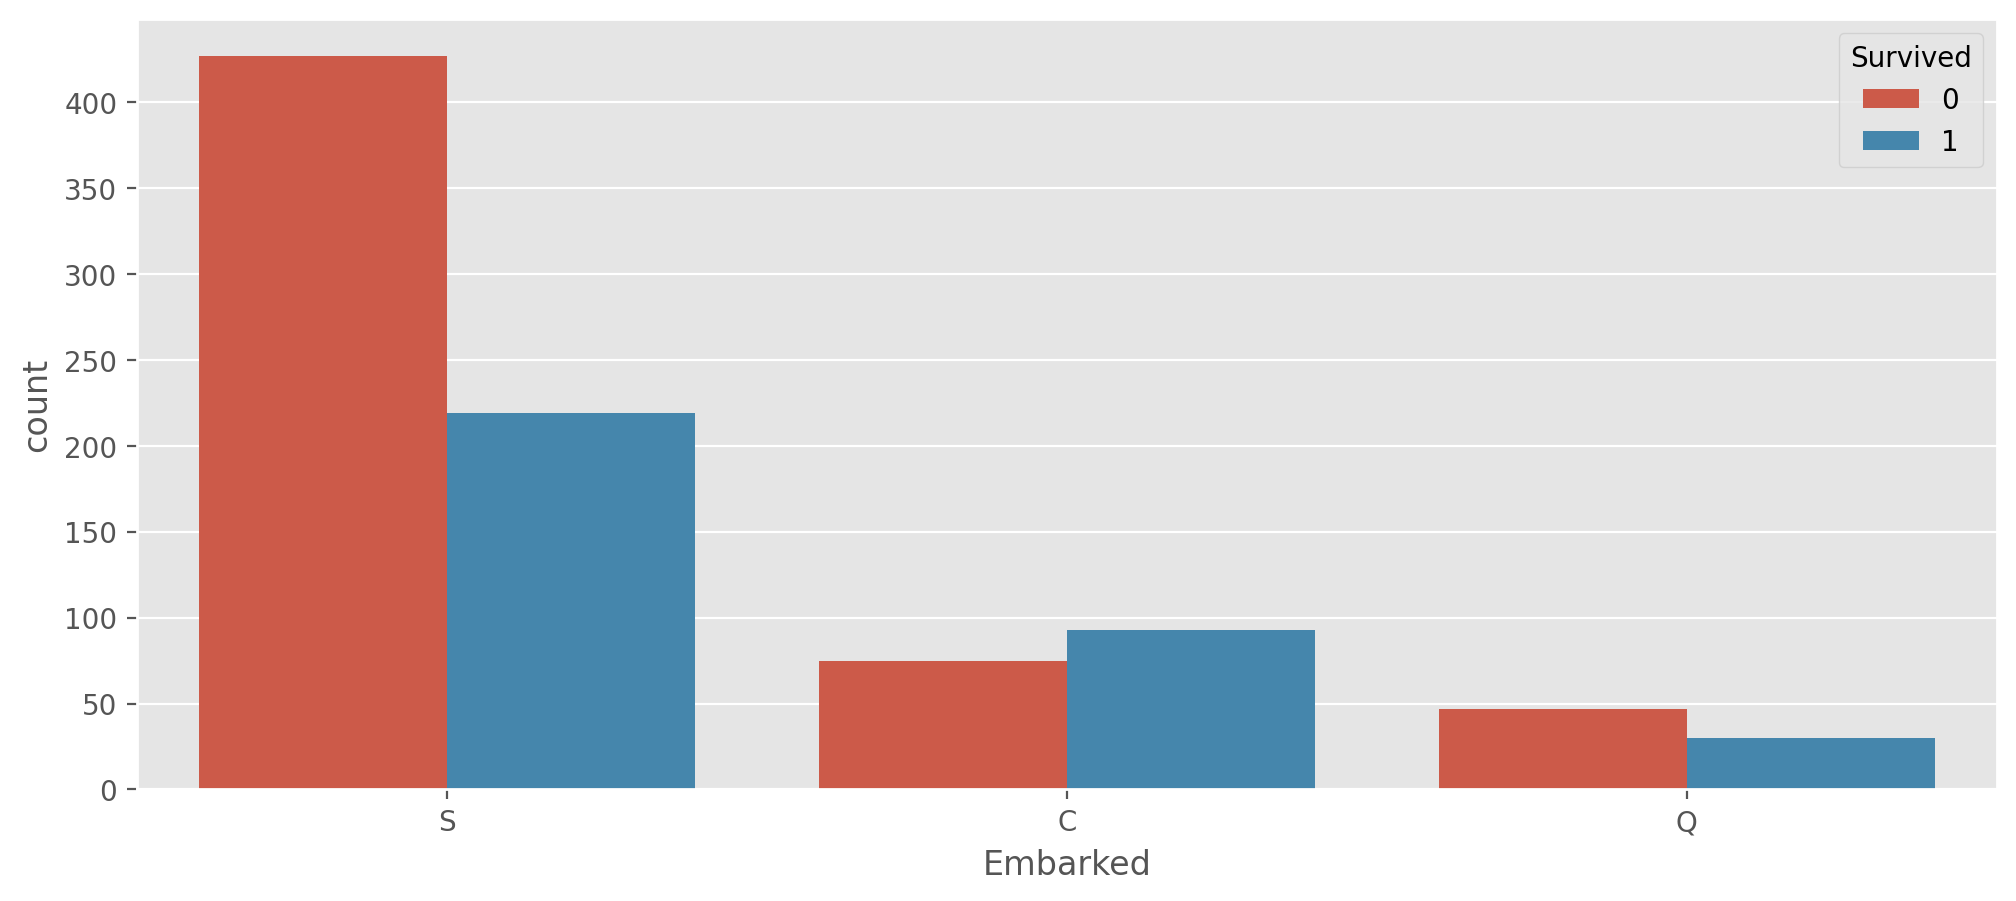

In [ ]:
# Analysing Embarked and survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Embarked', hue = 'Survived', data = titanic)

In [ ]:
svl_rate = titanic.groupby('Embarked')['Survived'].value_counts(normalize  = True)
svl_rate

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: proportion, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

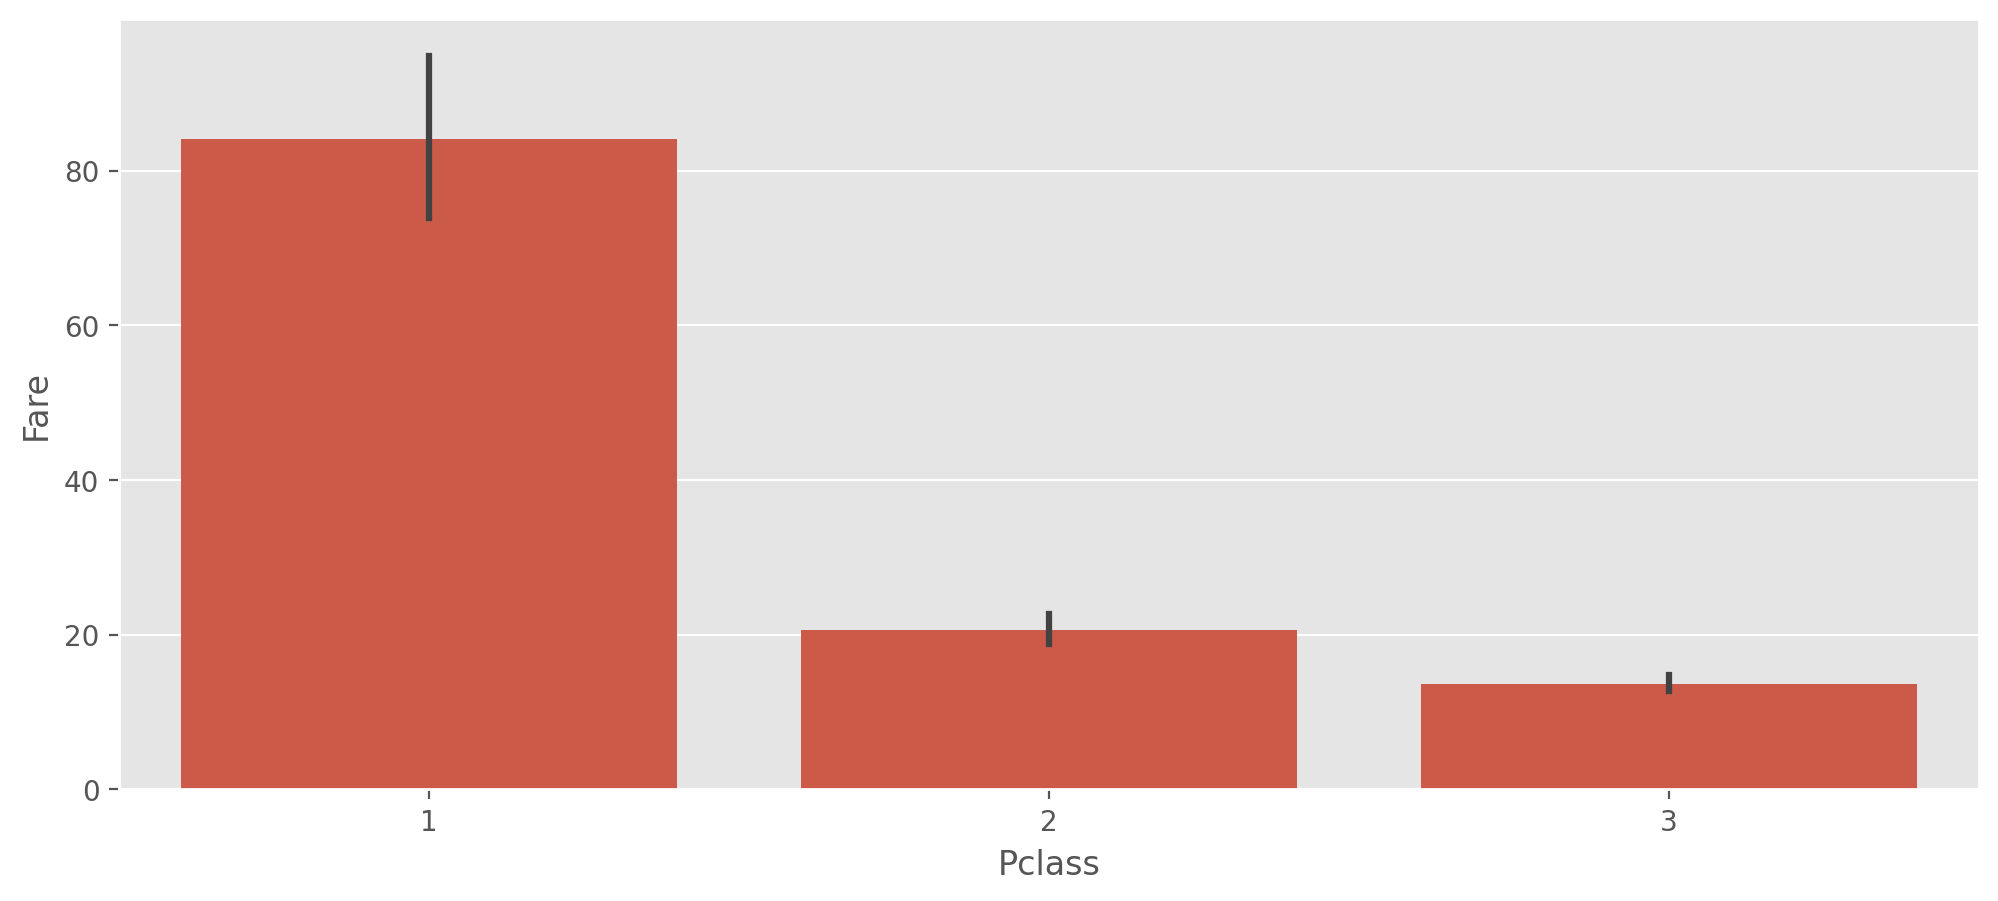

In [ ]:
# Fare and Passenger class
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x = 'Pclass', y = 'Fare', data = titanic)

<Axes: xlabel='Pclass', ylabel='Fare'>

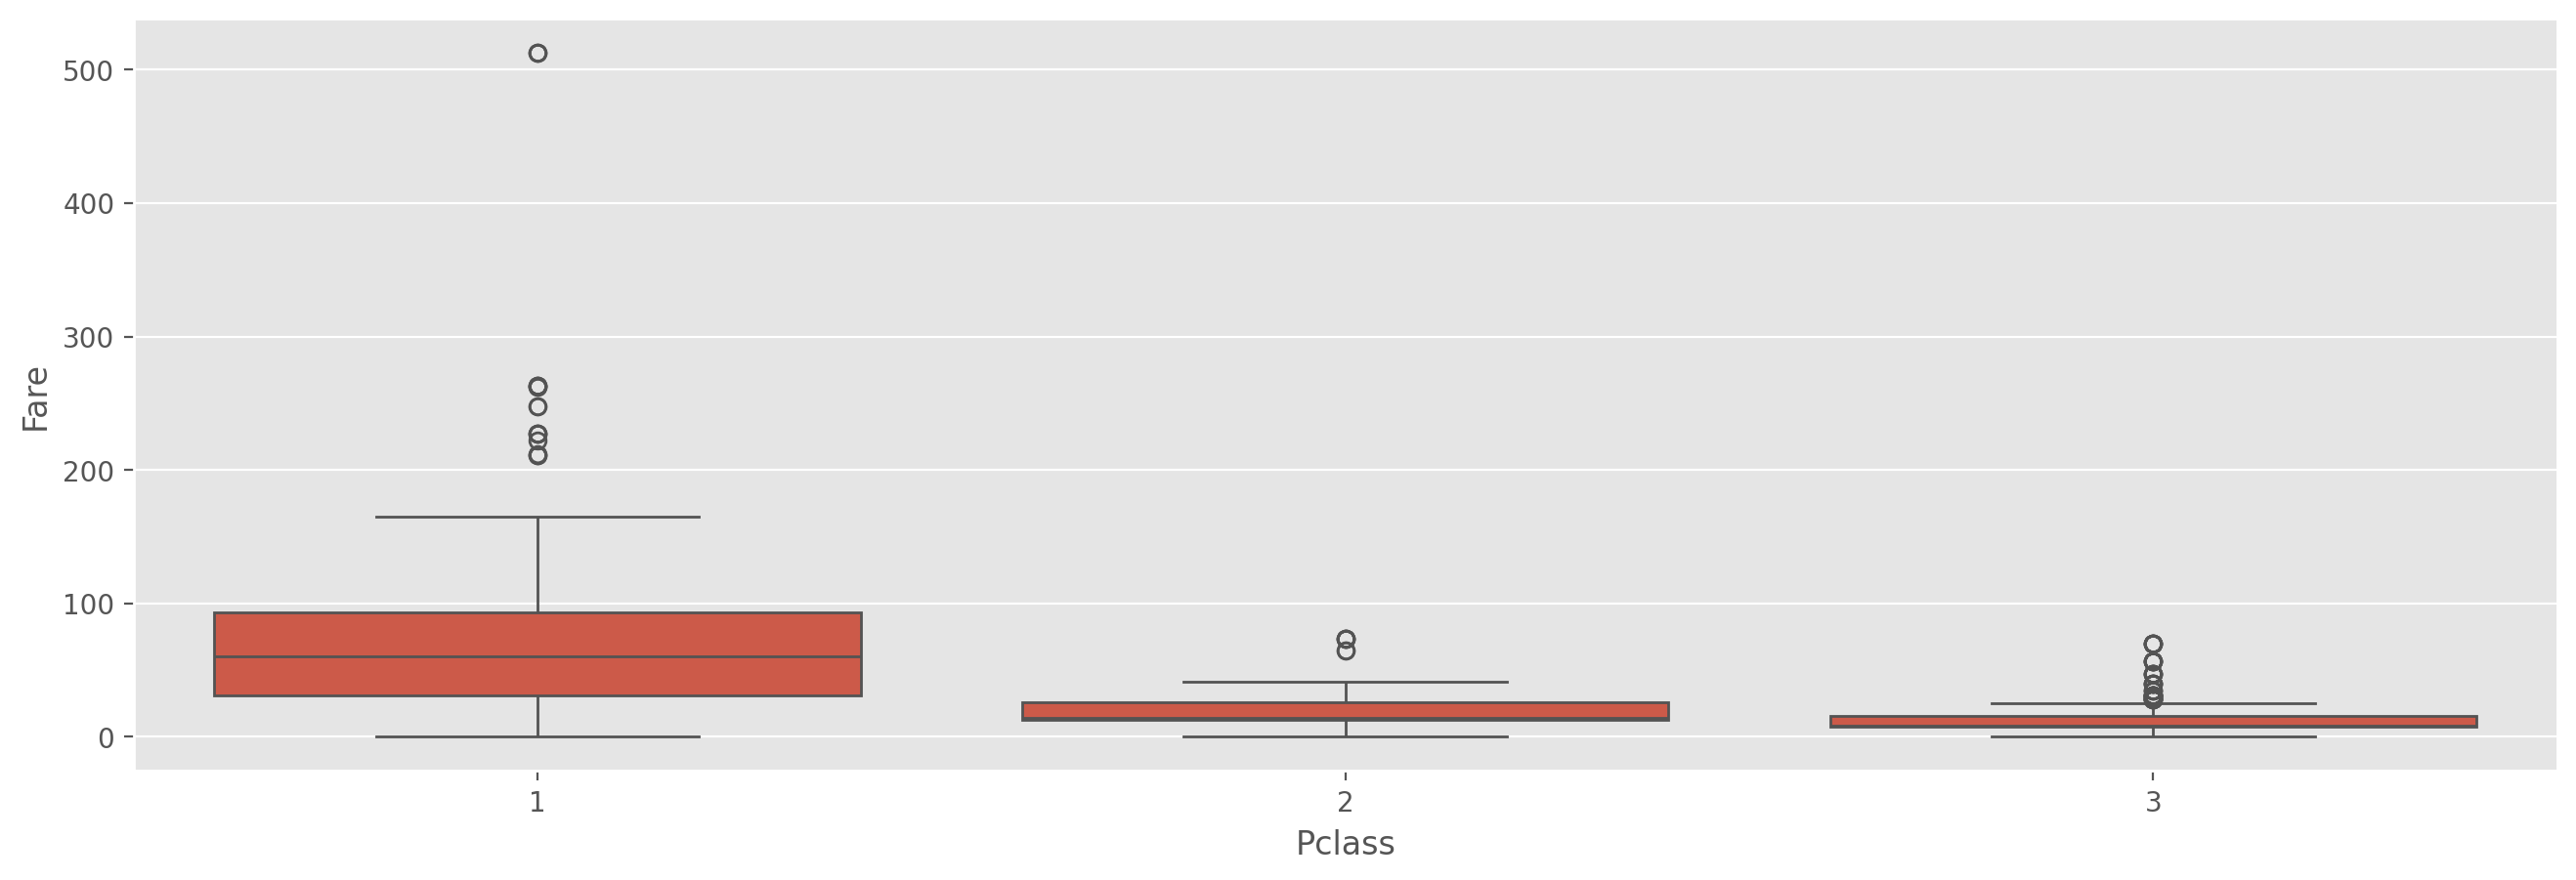

In [ ]:
plt.figure(figsize = (16,5), dpi = 200)
sns.boxplot(x = 'Pclass', y = 'Fare', data = titanic)

<Axes: xlabel='Survived', ylabel='Fare'>

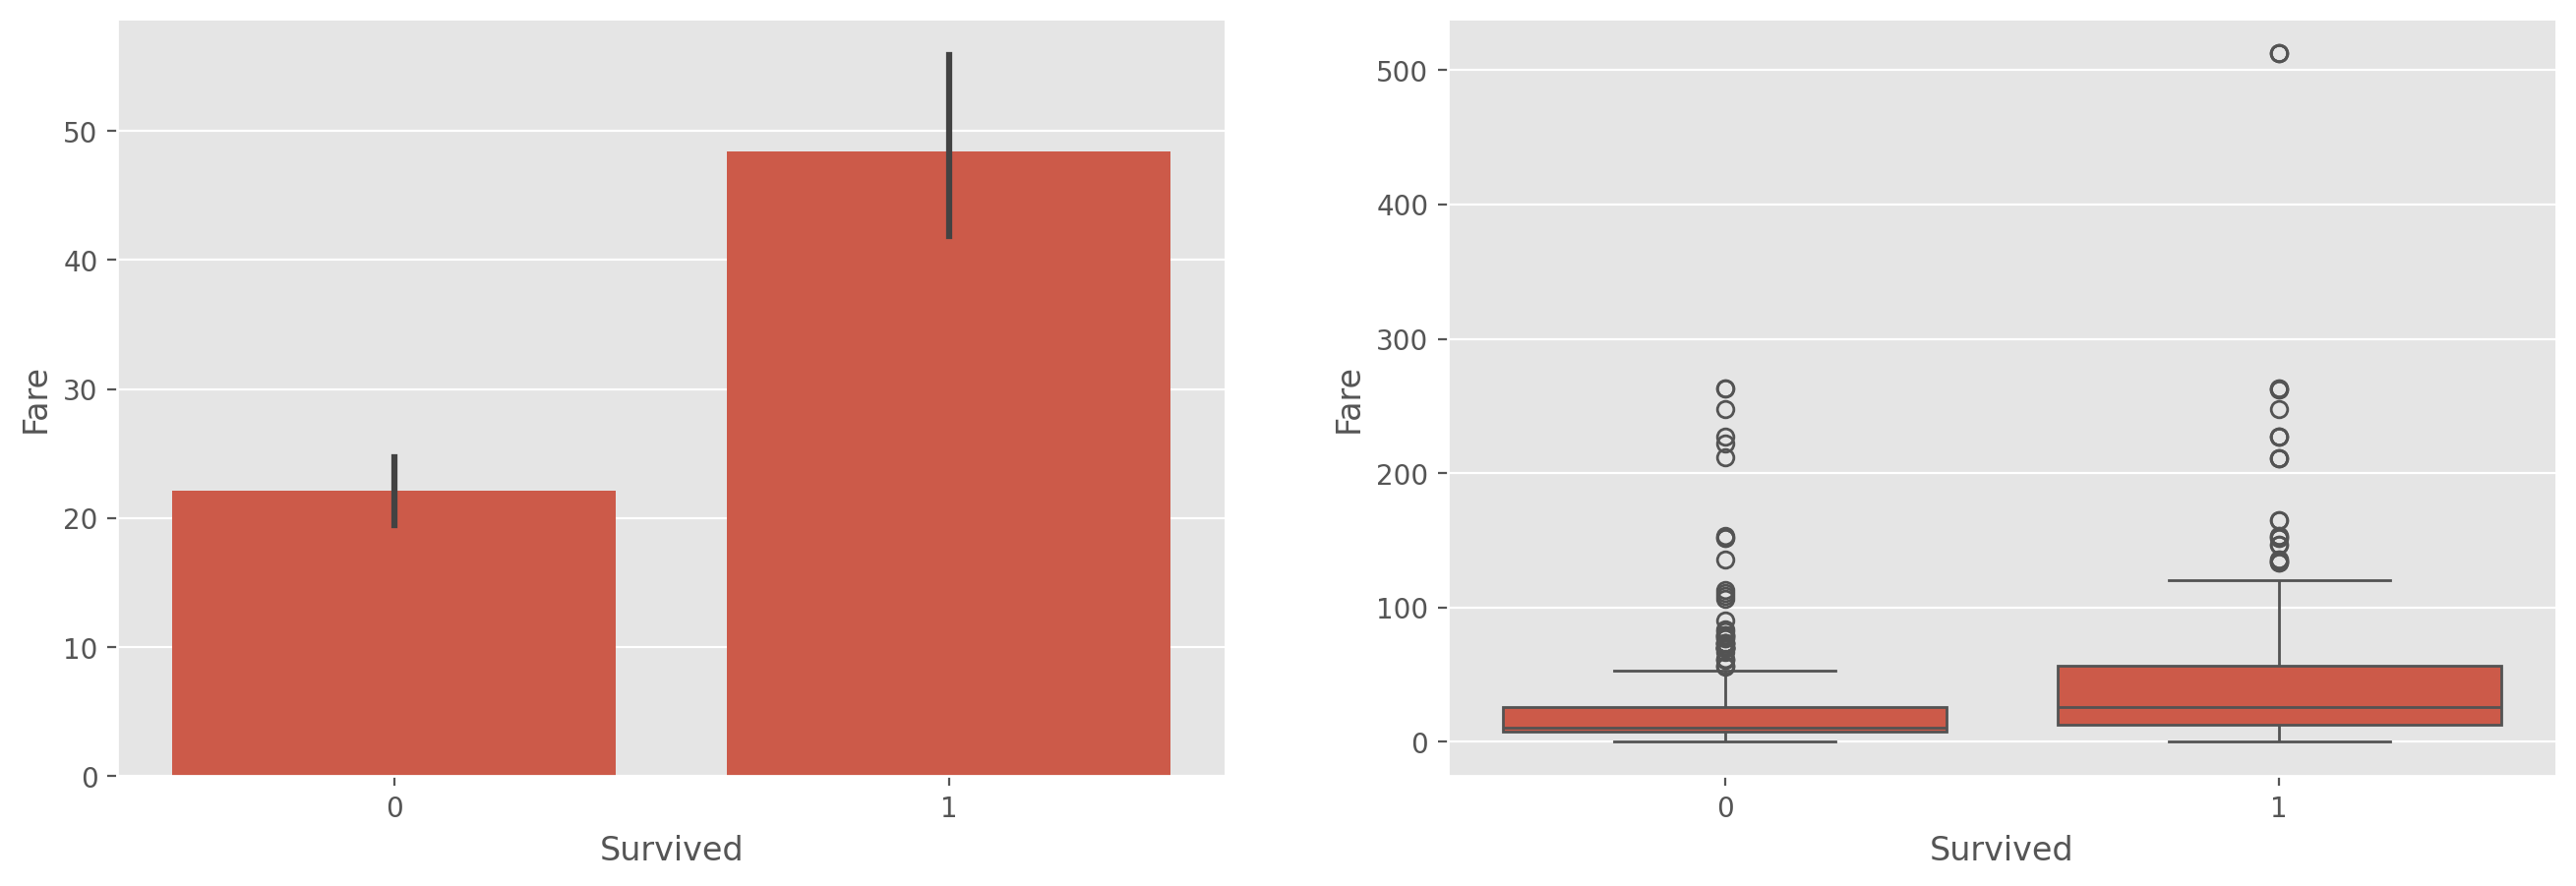

In [ ]:
# Fare and Survived
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x = 'Survived', y = 'Fare', data = titanic)
plt.subplot(1,2,2)
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic)

In [ ]:
titanic[titanic.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
258,259,1,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,512.3292,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,C,0


<Axes: ylabel='Age'>

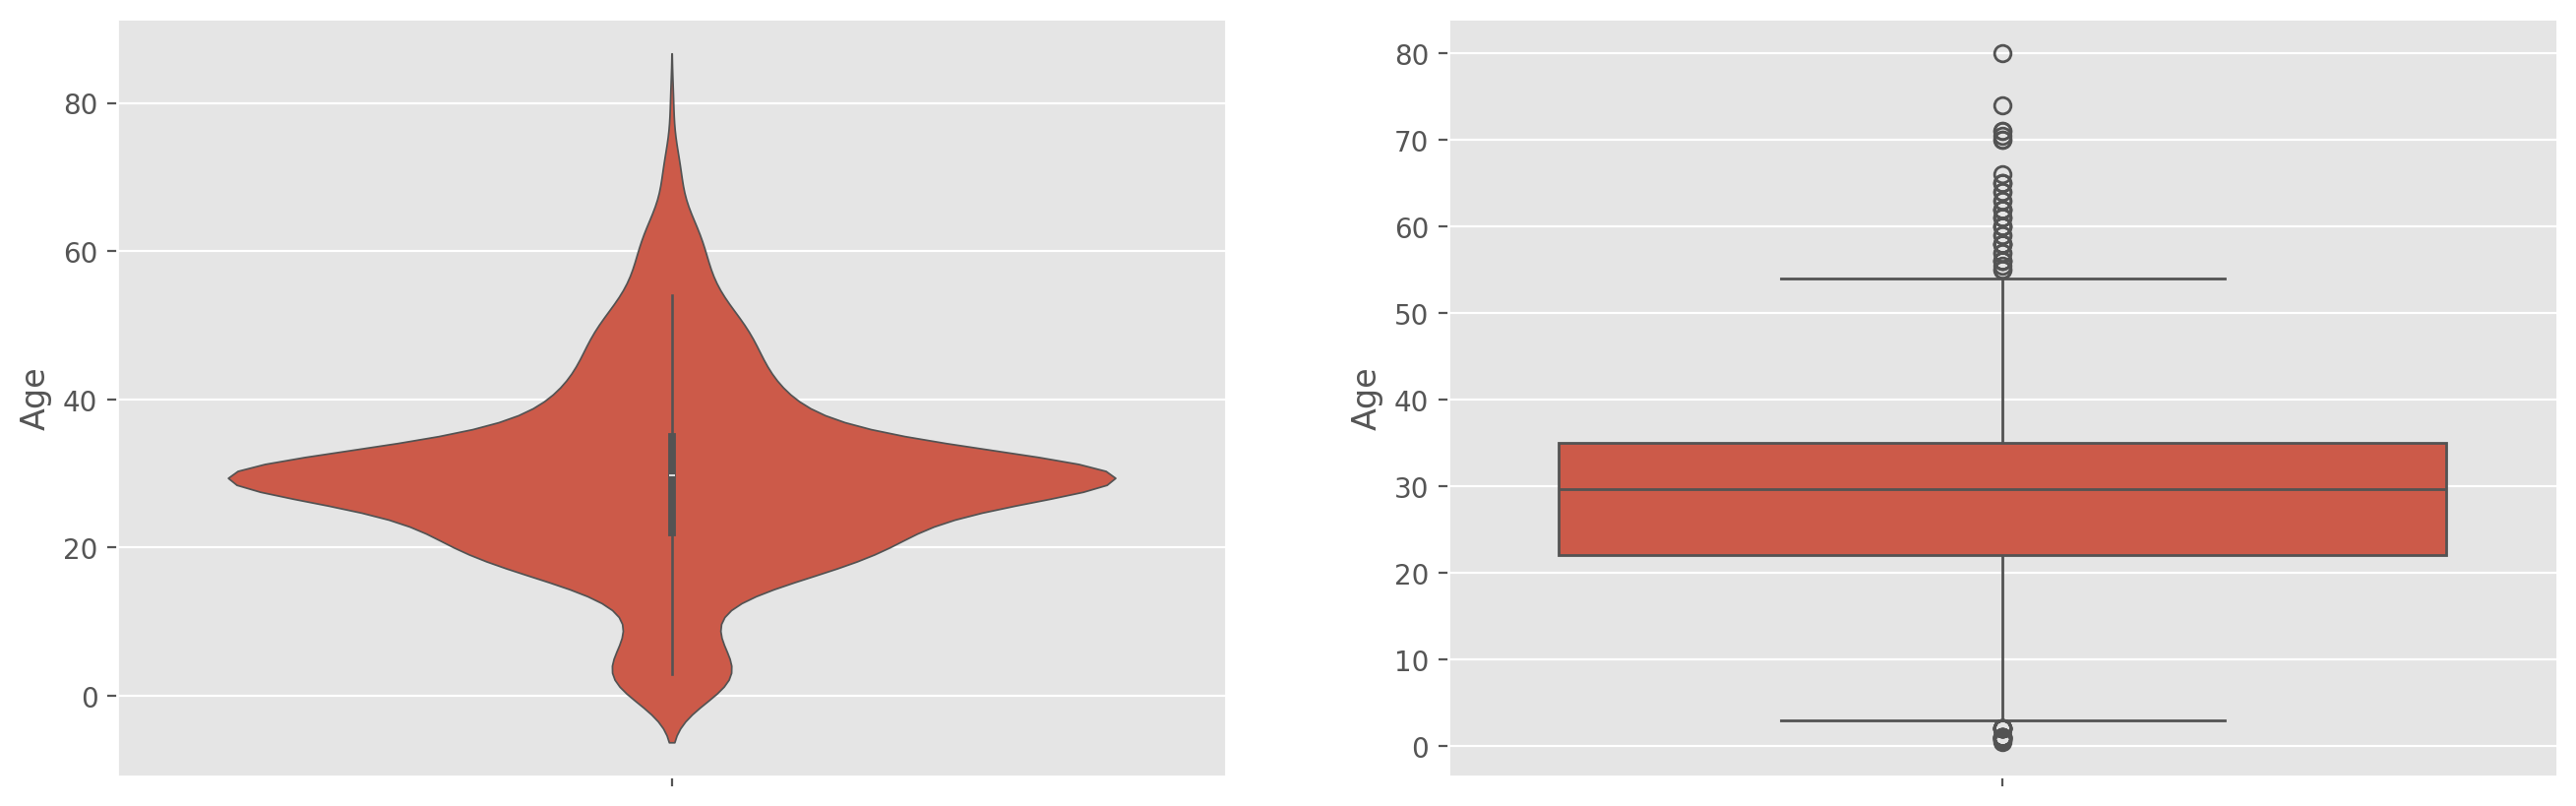

In [ ]:
# Age
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.violinplot(y = 'Age', data = titanic)
plt.subplot(1,2,2)
sns.boxplot(y = 'Age', data = titanic)

<Axes: xlabel='Survived', ylabel='Age'>

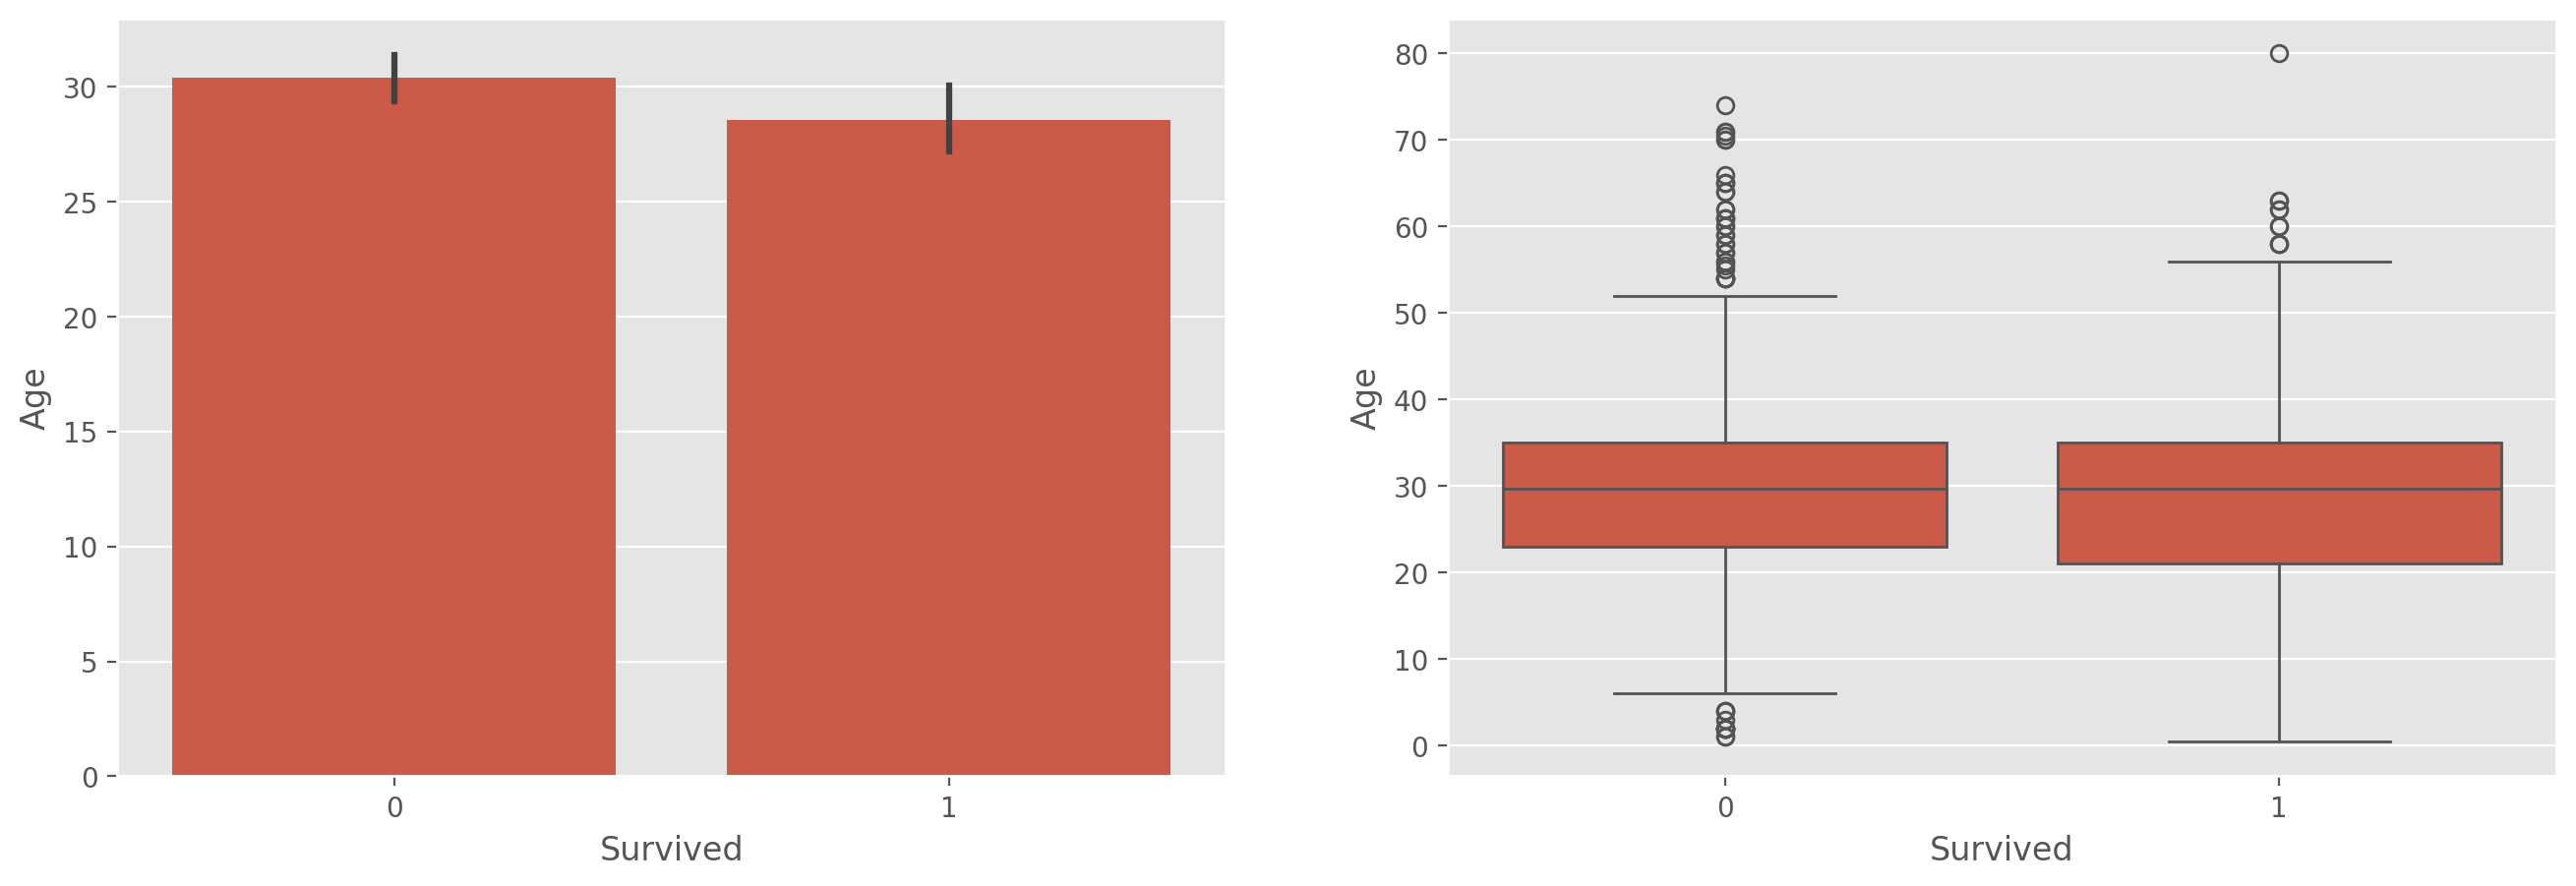

In [ ]:
# Age and Survived
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x = 'Survived', y = 'Age', data = titanic)
plt.subplot(1,2,2)
sns.boxplot(x = 'Survived', y = 'Age', data = titanic)

<Axes: xlabel='family_members', ylabel='count'>

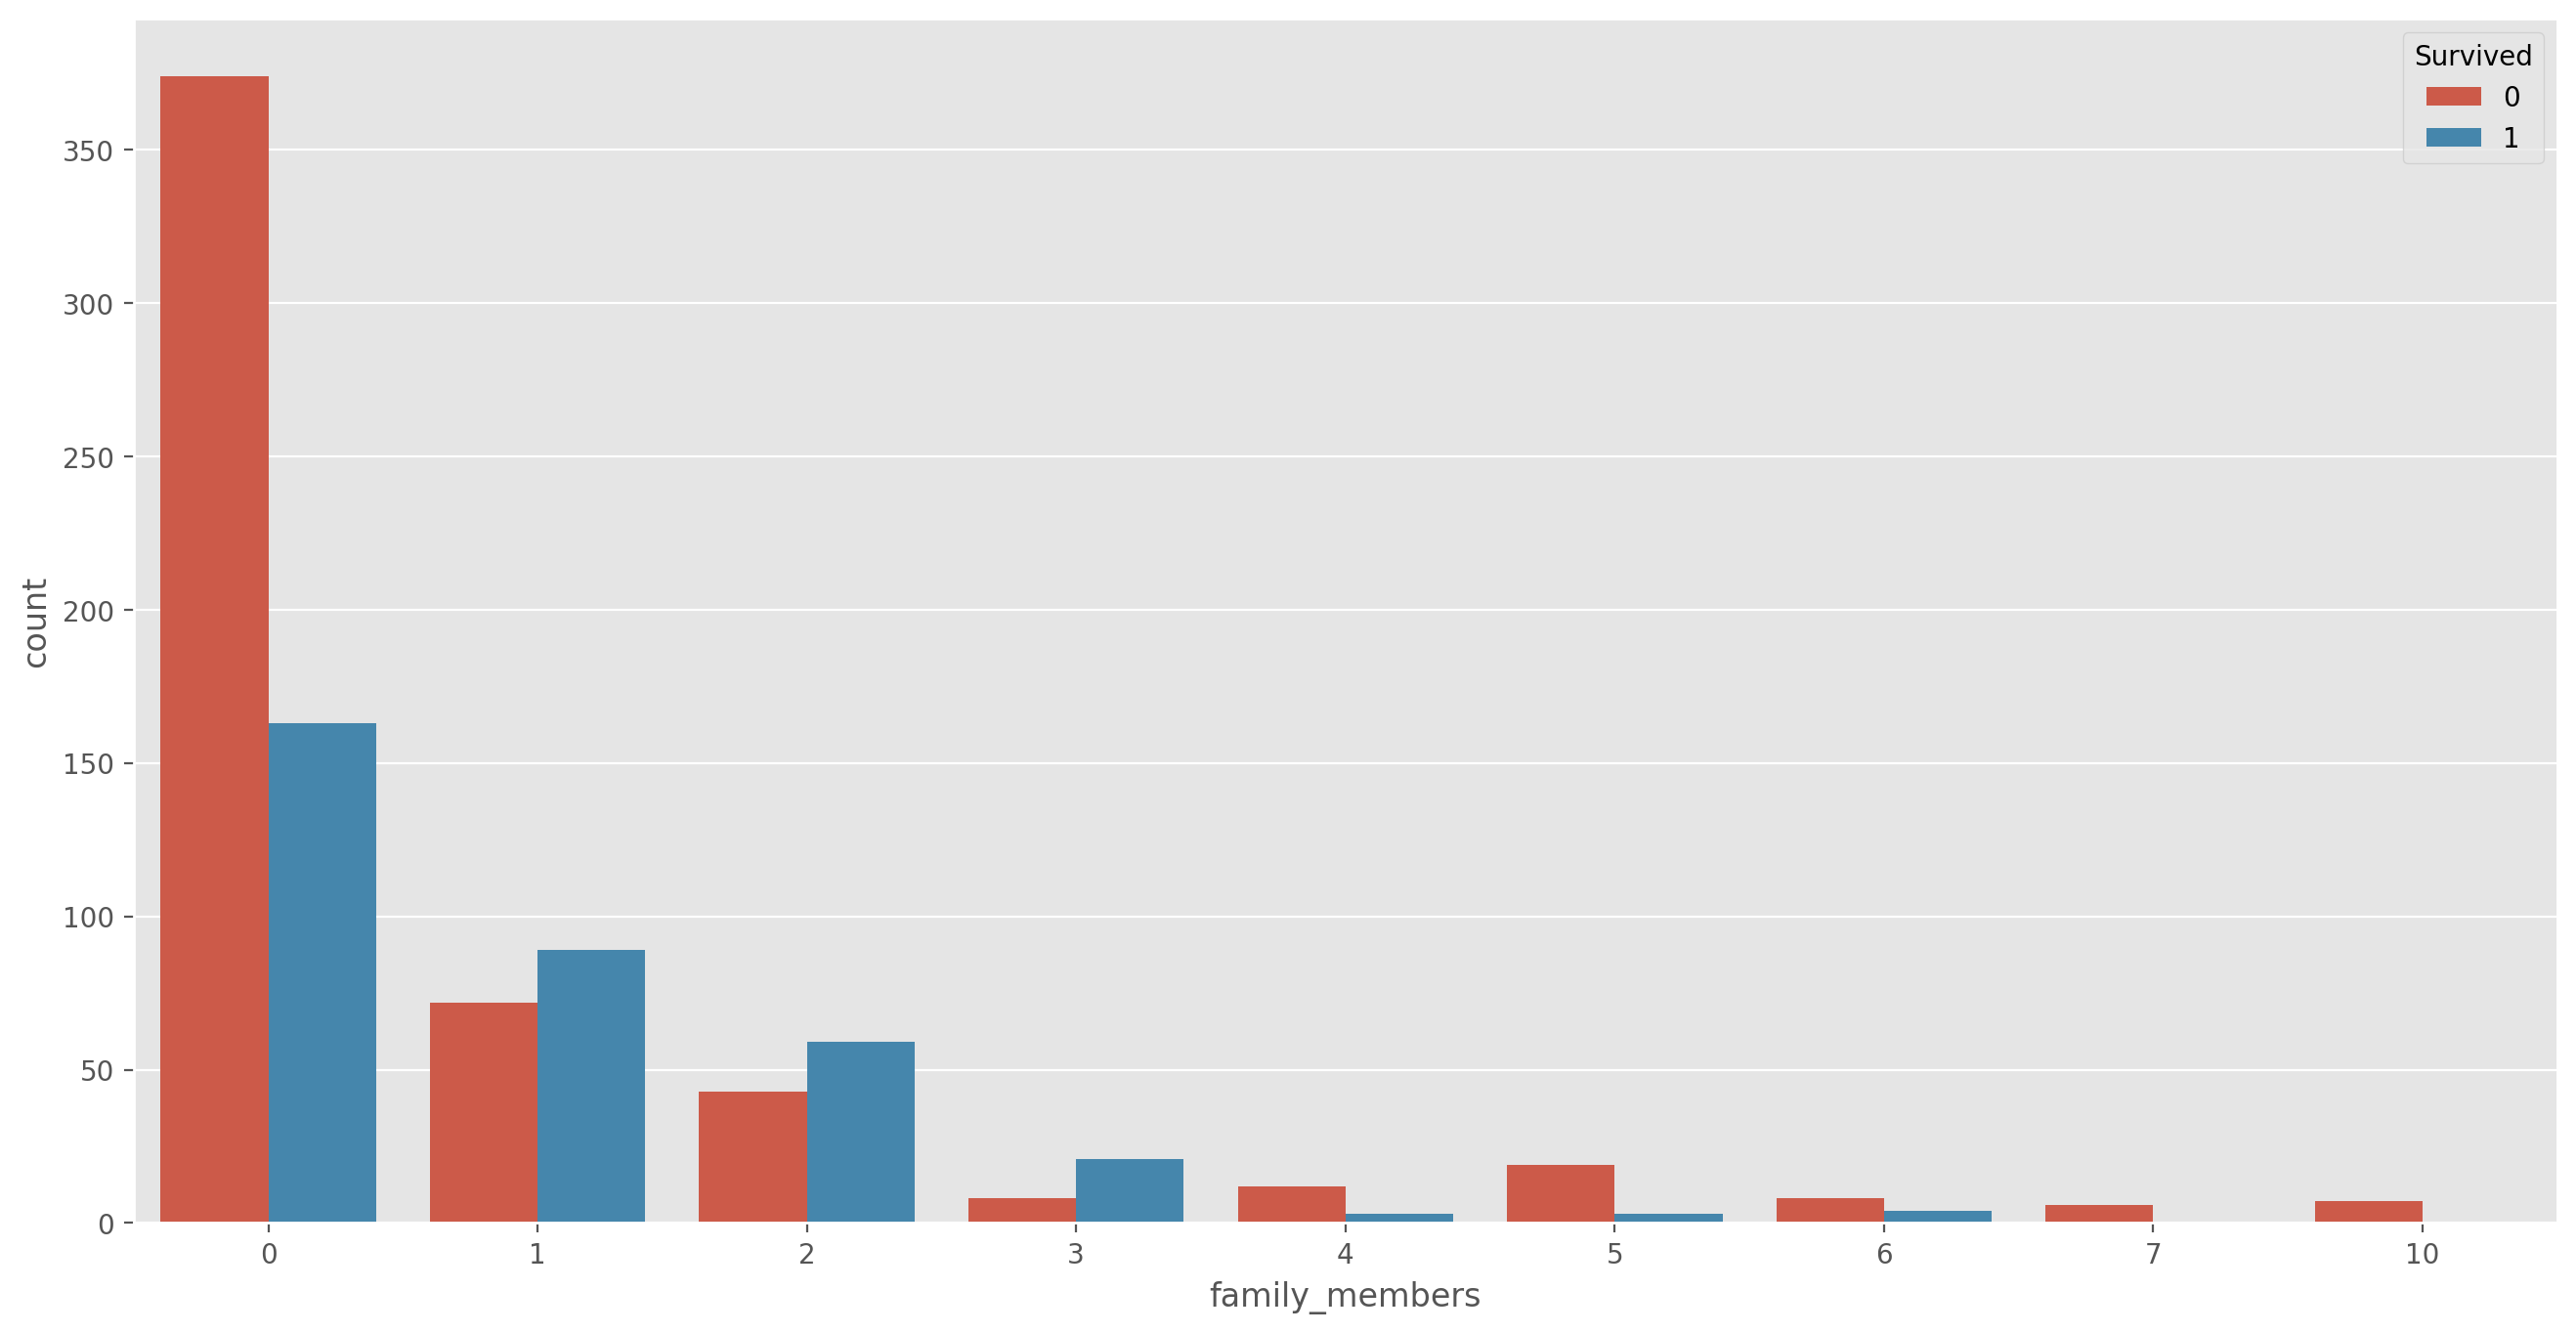

In [ ]:
 # Family members and survived
plt.figure(figsize = (16,8), dpi = 200)
sns.countplot(x = 'family_members', hue = 'Survived', data = titanic)